# Mean Reversion Model

In [1]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
from sharpe import gen_sharpe
from mean_rev_obj import Mean_Rev_Table

Downloading Data:

In [2]:
# YYYY-MM-DD
# for current day: str(date.today() - timedelta(1))
end = str(date.today() - timedelta(1))
# for 60 days ago for smaller timeframes: str(date.today() - timedelta(59))
# for 730 days ago for smaller timeframes: str(date.today() - timedelta(729))
start = "2024-05-01"

# model trading days input for crossover visualization in days. standard 1Y is 252 days. Can use multiples of 252 to track years
model_days = 219

#multi_level_index = False | removes ticker noise in table
QQQ = (yf.download("QQQ", start, end, interval = "1d", multi_level_index = False))


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


# Complete Table Creation

distance between percentile and sma:  0.9134141714308156 0.936922551863577 1.0098383030109384 1.0417761427584817 1.0448325226872912


,Day Count,Open,High,Low,Close,21-day SMA,Return,Cumulative Return,Mean Reversion Model Return,Cumulative Mean Reversion Model Return,Ratio,Position,Signal,Entry
Date,,,,,,,,,,,,,,
2024-06-13-00:00,31,474.818,475.484,471.538,473.824,454.524,NaN,NaN,-0.541,-0.540,1.042,-1,-1.0,-1.0
2024-06-14-00:00,32,473.625,476.348,473.158,476.279,455.981,0.517,0.518,-0.517,-1.052,1.045,-1,-1.0,0.0
2024-06-17-00:00,33,476.547,483.902,475.235,482.113,457.225,1.217,1.749,-1.218,-2.250,1.054,-2,-1.0,-1.0
2024-06-18-00:00,34,482.063,482.948,480.493,482.262,458.791,0.031,1.781,-0.031,-2.281,1.051,-2,-1.0,0.0
2024-06-20-00:00,35,483.465,483.882,476.706,478.545,460.374,-0.774,0.996,0.774,-1.521,1.039,-2,-1.0,0.0
2024-06-21-00:00,36,478.267,479.608,475.762,477.263,461.631,-0.268,0.726,0.268,-1.257,1.034,-2,-1.0,0.0
2024-06-24-00:00,37,476.030,477.772,471.690,471.829,462.785,-1.145,-0.421,1.145,-0.120,1.020,-2,-1.0,0.0
2024-06-25-00:00,38,473.930,477.524,472.984,477.225,463.685,1.137,0.718,-1.137,-1.249,1.029,-2,-1.0,0.0
2024-06-26-00:00,39,476.399,478.758,475.981,478.211,464.938,0.206,0.926,-0.206,-1.452,1.029,-2,-1.0,0.0


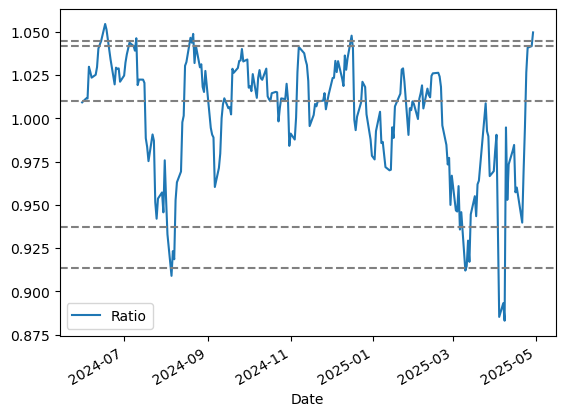

In [3]:
QQQ_mean_rev = Mean_Rev_Table(QQQ, ma1 = 21)
QQQ_mean_rev.gen_table()

IndexError: index -220 is out of bounds for axis 0 with size 219

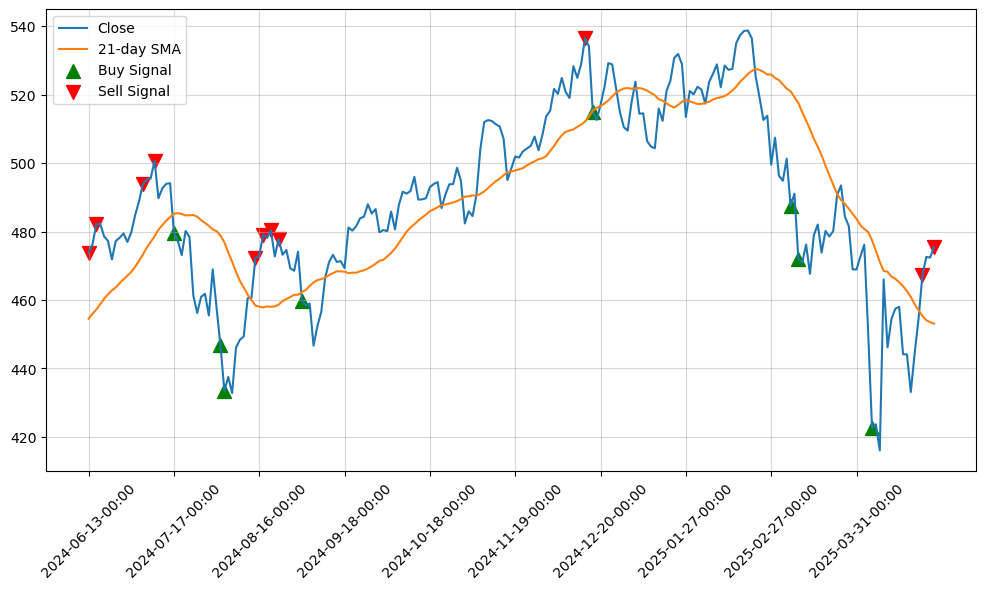

In [4]:
QQQ_mean_rev.gen_visual(model_days)

# Buy/Hold Returns Comparison

In [ ]:
QQQ_mean_rev.gen_comp("QQQ")
QQQ_mean_rev.print_cumulative_return("QQQ")

# Buy/Sell Signal Visualization (Proof)

# Sharpe Ratio: